In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
df = pd.read_csv(r"C:\Users\Kiat Kai\Desktop\NOTES\Udemy\Build a Portfolio of 5 Datta Analysis Projects with Python\Bitcoin\bitcoin_price_Training - Training.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


## Data Prepreprocessing

In [4]:
df.shape

(1556, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [7]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [8]:
# Convert date object to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [9]:
df.Date.min()

Timestamp('2013-04-28 00:00:00')

In [10]:
df.Date.max()

Timestamp('2017-07-31 00:00:00')

In [11]:
# Check for missing values
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [12]:
# Check for duplicated values
df.duplicated().sum()

0

In [16]:
data = df.sort_index(ascending=False).reset_index()
data = data.drop('index', axis = 1)

## What was the change price of the stock overtime?

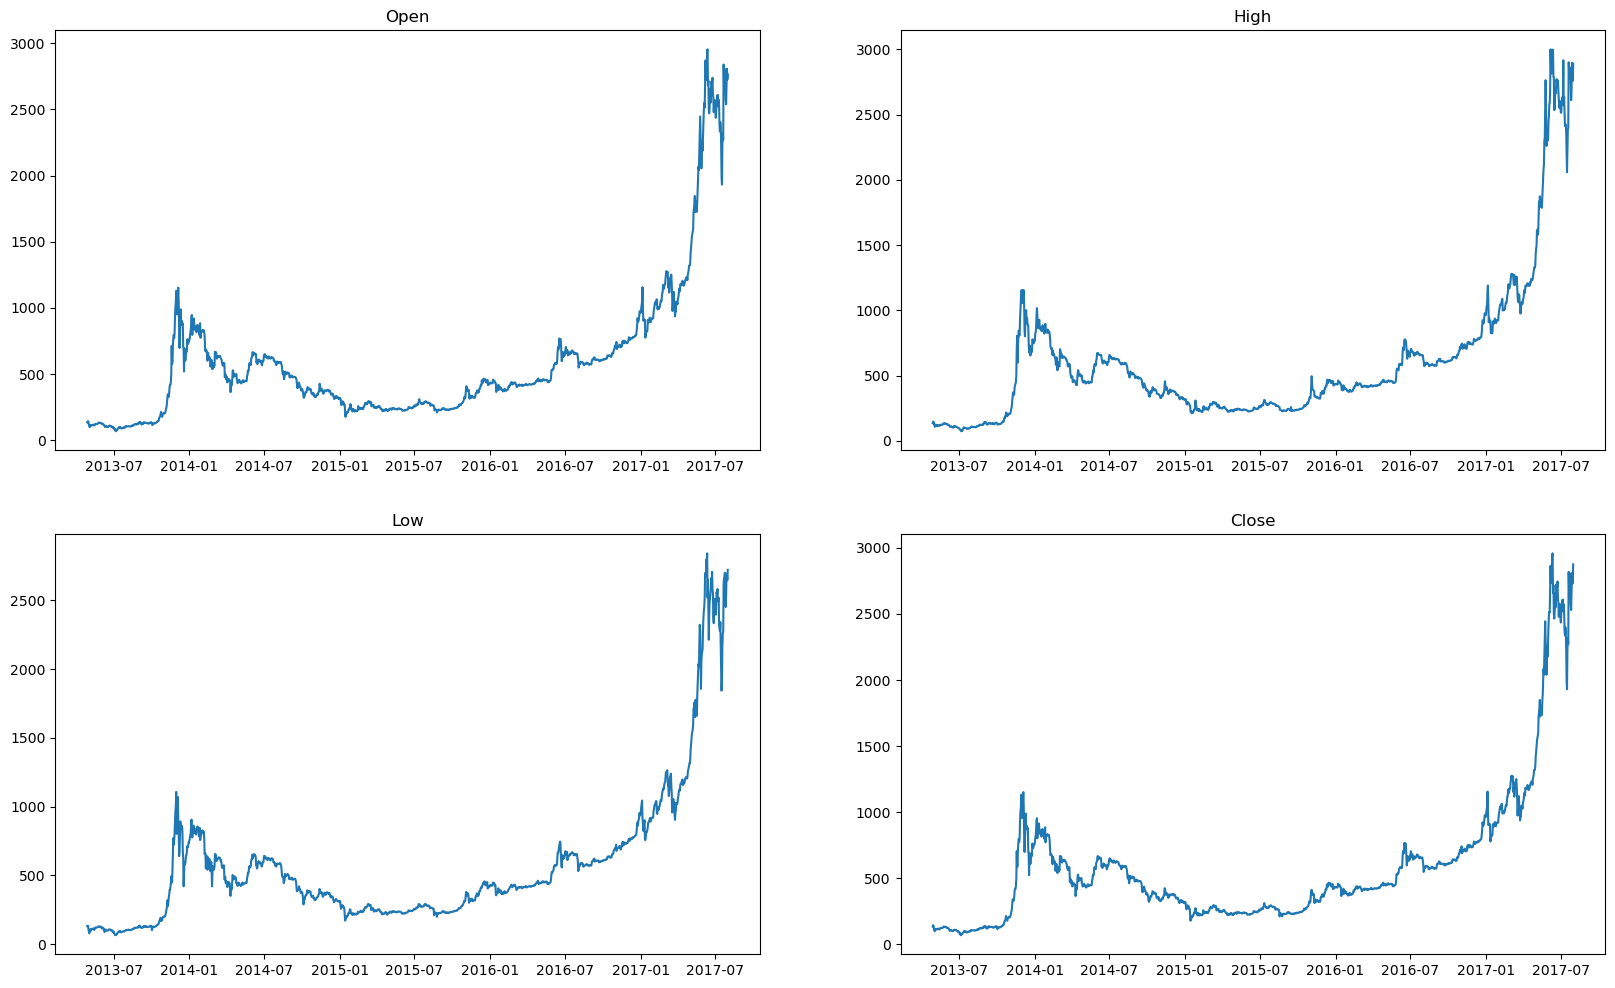

In [20]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open','High','Low','Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

In [23]:
init_notebook_mode(connected=True)

In [26]:
trace = go.Candlestick(x=data['Date'],
                      high=data['High'],
                      open=data['Open'],
                      close=data['Close'],
                      low=data['Low'])

candle_data = [trace]

In [31]:
layout = {
    'title':'Bitcoin Historical Price',
    'xaxis':{'title':'Date'}
}

fig = go.Figure(data = candle_data, layout=layout)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## Analysing Closing Price

In [ ]:
data.set_index('Date', inplace=True)

- An increase in price from \\$10 to \\$15 is represented by the same upward movement as in an increase between \\$20 and \\$25 on the linear chart.
- However, on a log chart, the change from  \\$10 to \\$15 shows a 50% increase in asset's price. While the change from \\$20 to \\$25 shows a 25% increase in asset's price. Since 50% gain is more significant, a larger distance will be used to show the magnitude of the changes.
- When using a log scale, the vertical distance between the prices ont eh linear scale will be equal when for e.g. the change is from \\$10 to \\$15 and when there is a change from \\$20 to \\$30.

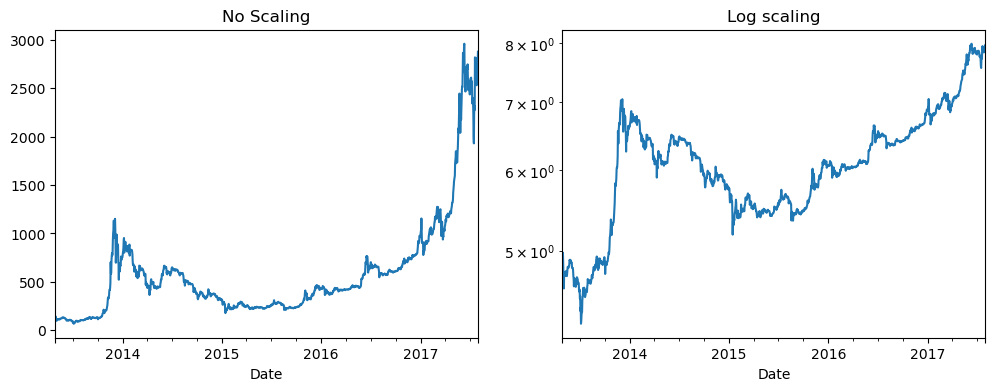

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

## Analyse closing Price on Yearly, Quartely, Monthly basis

<AxesSubplot:xlabel='Date'>

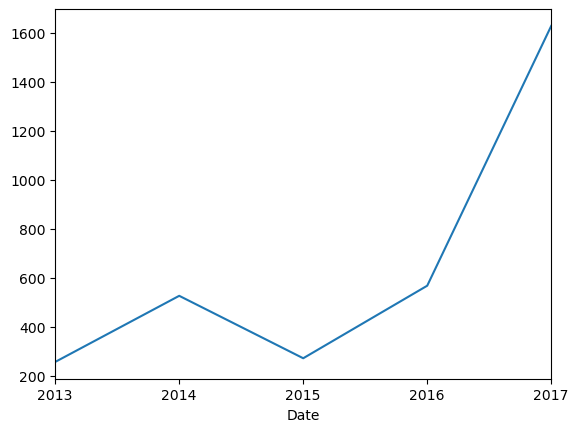

In [51]:
# Yearly
data['Close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

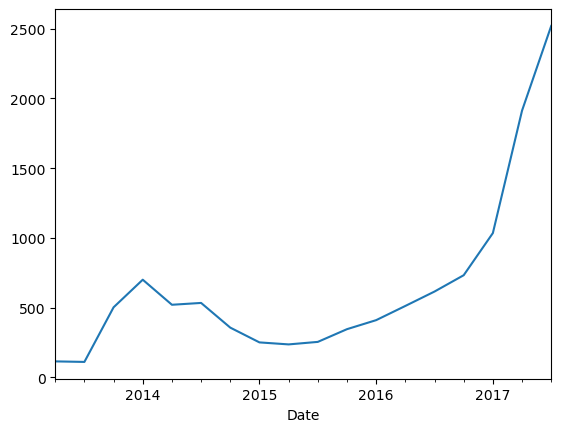

In [53]:
# Quarterly
data['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

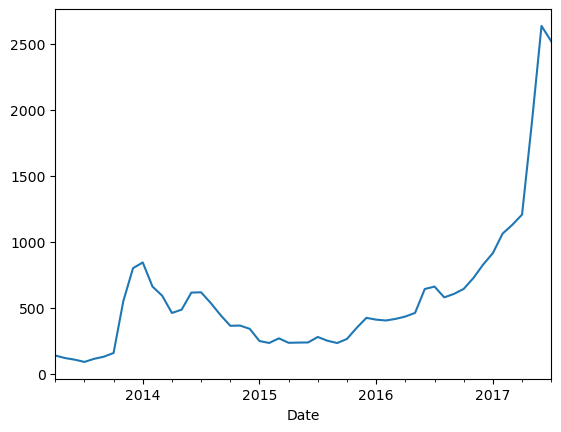

In [52]:
# Monthly
data['Close'].resample('M').mean().plot()